In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import wfdb
import pandas as pd

In [4]:
from utils.scoring_metrics import (
    RefInfo, load_ans,
    score, ue_calculate, ur_calculate,
    compute_challenge_metric, gen_endpoint_score_mask,
)
from utils.scoring_metrics_test import _load_af_episodes

# from database_reader.cpsc_databases import CPSC2021
# from data_reader import CINC2021Reader
from data_reader import CPSC2021Reader

from utils.misc import list_sum

In [5]:
db_dir = "/home/wenh06/Jupyter/data/CPSC2021/"

# check data reader

In [6]:
dr = CPSC2021Reader(db_dir=db_dir)

log file path is set "/home/wenh06/Jupyter/wenhao/workspace/cpsc2021/CPSC2021Reader-CPSC2021.log"
levels of c_handler and f_handler are set DEBUG


In [7]:
dr.df_stats

,record,tranche,subject_id,record_id,label,fs,sig_len,revised
0,data_0_1,training_I,0,1,N,200,208381,0
1,data_0_2,training_I,0,2,N,200,12390,0
2,data_0_3,training_I,0,3,N,200,57297,0
3,data_0_4,training_I,0,4,N,200,433940,0
4,data_0_5,training_I,0,5,N,200,626719,0
...,...,...,...,...,...,...,...,...
1431,data_104_24,training_II,104,24,AFp,200,54796,1
1432,data_104_25,training_II,104,25,AFp,200,19035,1
1433,data_104_26,training_II,104,26,AFp,200,17971,1
1434,data_104_27,training_II,104,27,AFp,200,17043,1


In [8]:
dr.diagnoses_records_list

{'N': ['data_0_1',
  'data_0_2',
  'data_0_3',
  'data_0_4',
  'data_0_5',
  'data_0_6',
  'data_0_7',
  'data_0_8',
  'data_0_9',
  'data_0_10',
  'data_0_11',
  'data_0_12',
  'data_0_13',
  'data_0_14',
  'data_0_15',
  'data_1_1',
  'data_1_2',
  'data_1_3',
  'data_1_4',
  'data_1_5',
  'data_1_6',
  'data_1_7',
  'data_1_8',
  'data_1_9',
  'data_2_1',
  'data_2_2',
  'data_2_3',
  'data_2_4',
  'data_2_5',
  'data_2_6',
  'data_2_7',
  'data_2_8',
  'data_2_9',
  'data_2_10',
  'data_2_11',
  'data_2_12',
  'data_2_13',
  'data_2_14',
  'data_2_15',
  'data_2_16',
  'data_2_17',
  'data_3_2',
  'data_4_1',
  'data_4_2',
  'data_4_3',
  'data_4_4',
  'data_4_5',
  'data_4_6',
  'data_4_7',
  'data_4_8',
  'data_4_9',
  'data_4_10',
  'data_5_1',
  'data_5_2',
  'data_5_3',
  'data_5_4',
  'data_5_5',
  'data_5_6',
  'data_5_7',
  'data_5_8',
  'data_5_9',
  'data_5_10',
  'data_6_1',
  'data_6_2',
  'data_6_3',
  'data_6_4',
  'data_6_5',
  'data_6_6',
  'data_6_7',
  'data_6_8',

### normal class

In [9]:
rec = dr.diagnoses_records_list["N"][42]
rec

'data_4_1'

In [11]:
hehe_data = dr.load_data(rec)

hehe_data.shape

(2, 321594)

In [12]:
dr._get_path(rec)

'/home/wenh06/Jupyter/data/CPSC2021/training_I/data_4_1'

In [13]:
dr.load_ann(rec)

{'rpeaks': array([    30,    150,    248, ..., 321296, 321431, 321565]),
 'af_episodes': [],
 'label': 'N'}

In [18]:
dr.load_label(rec, fmt="f"), dr.load_label(rec, fmt="a"), dr.load_label(rec, fmt="n")

('non atrial fibrillation', 'N', 0)

In [23]:
hehe_rpeaks = dr.load_rpeaks(rec)
hehe_rpeaks.shape

(2292,)

In [22]:
dr.load_rpeaks(rec, sampfrom=100, zero_start=True)

array([    50,    148,    222, ..., 321196, 321331, 321465])

In [26]:
dr.load_af_episodes(rec, fmt="intervals")

[]

In [27]:
dr.load_af_episodes(rec, fmt="c_intervals")

[]

In [29]:
hehe_mask = dr.load_af_episodes(rec, fmt="mask")

hehe_mask.shape

(321594,)

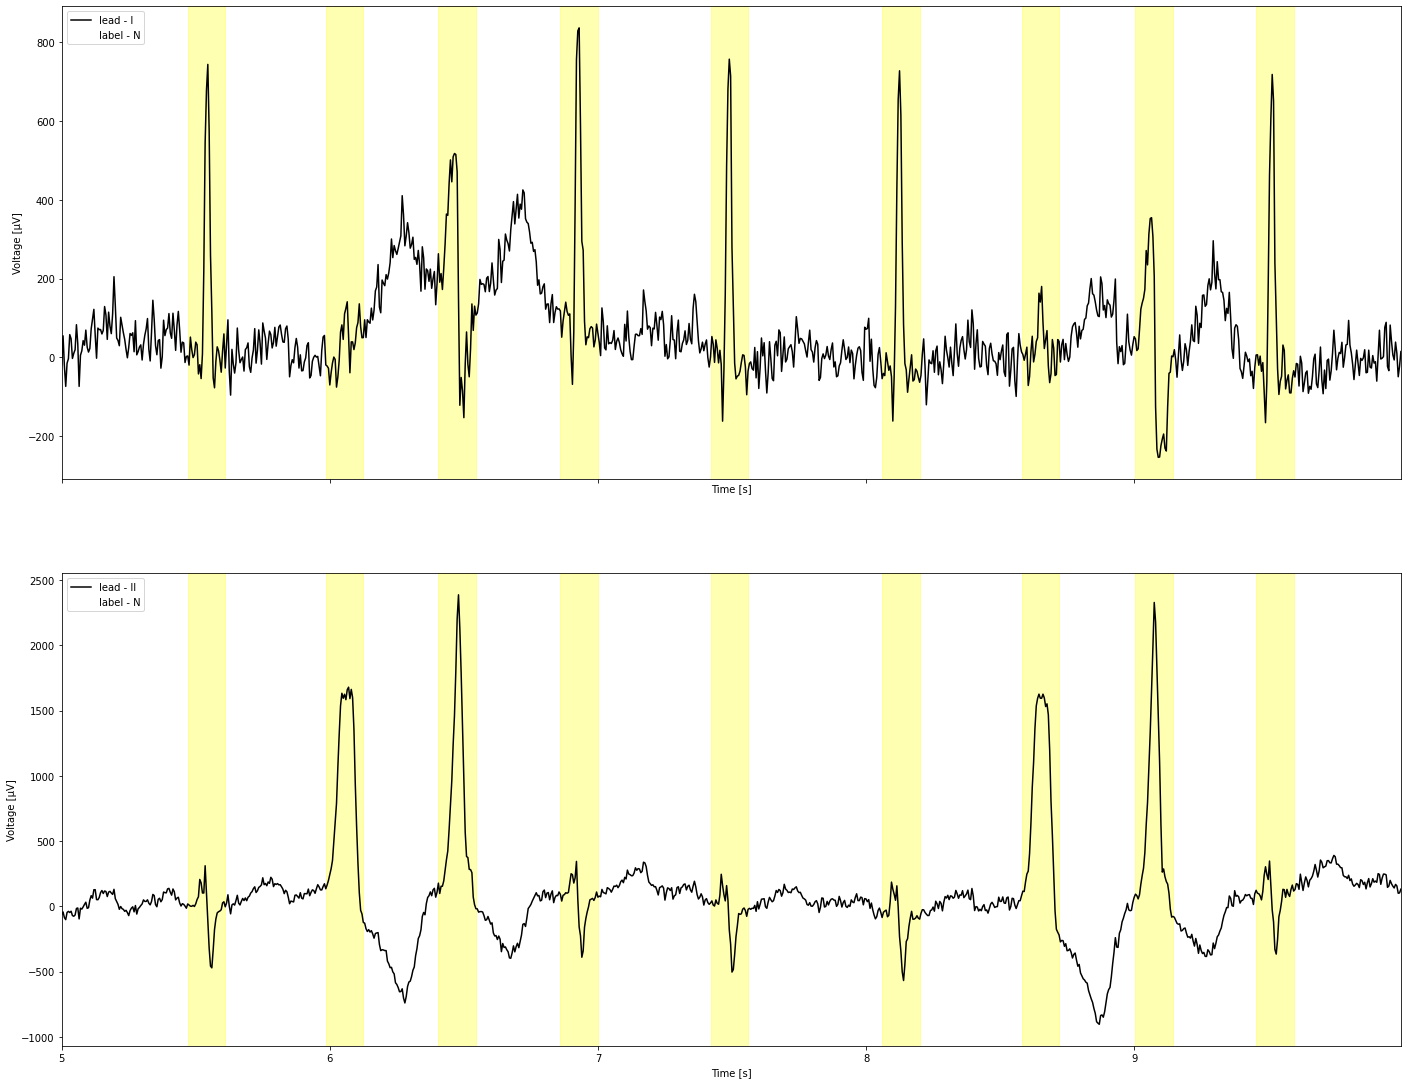

In [30]:
dr.plot(rec, sampfrom=1000, sampto=2000)

### AFp

In [53]:
rec = dr.diagnoses_records_list["AFp"][42]
rec

'data_32_12'

In [54]:
hehe_data = dr.load_data(rec)

hehe_data.shape

(2, 679269)

In [55]:
dr._get_path(rec)

'/home/wenh06/Jupyter/data/CPSC2021/training_I/data_32_12'

In [56]:
dr.load_ann(rec)

{'rpeaks': array([    30,    164,    324, ..., 678948, 679094, 679239]),
 'af_episodes': [[0, 670505]],
 'label': 'AFp'}

In [57]:
dr.load_label(rec, fmt="f"), dr.load_label(rec, fmt="a"), dr.load_label(rec, fmt="n")

('paroxysmal atrial fibrillation', 'AFp', 2)

In [58]:
hehe_rpeaks = dr.load_rpeaks(rec)
hehe_rpeaks.shape

(3860,)

In [59]:
dr.load_rpeaks(rec, sampfrom=1000, zero_start=True)

array([    63,    179,    306, ..., 677948, 678094, 678239])

In [60]:
dr.load_af_episodes(rec, fmt="intervals")

[[0, 670505]]

In [61]:
dr.load_af_episodes(rec, fmt="c_intervals")

[[0, 3802]]

In [62]:
hehe_mask = dr.load_af_episodes(rec, fmt="mask")

hehe_mask.shape

(679269,)

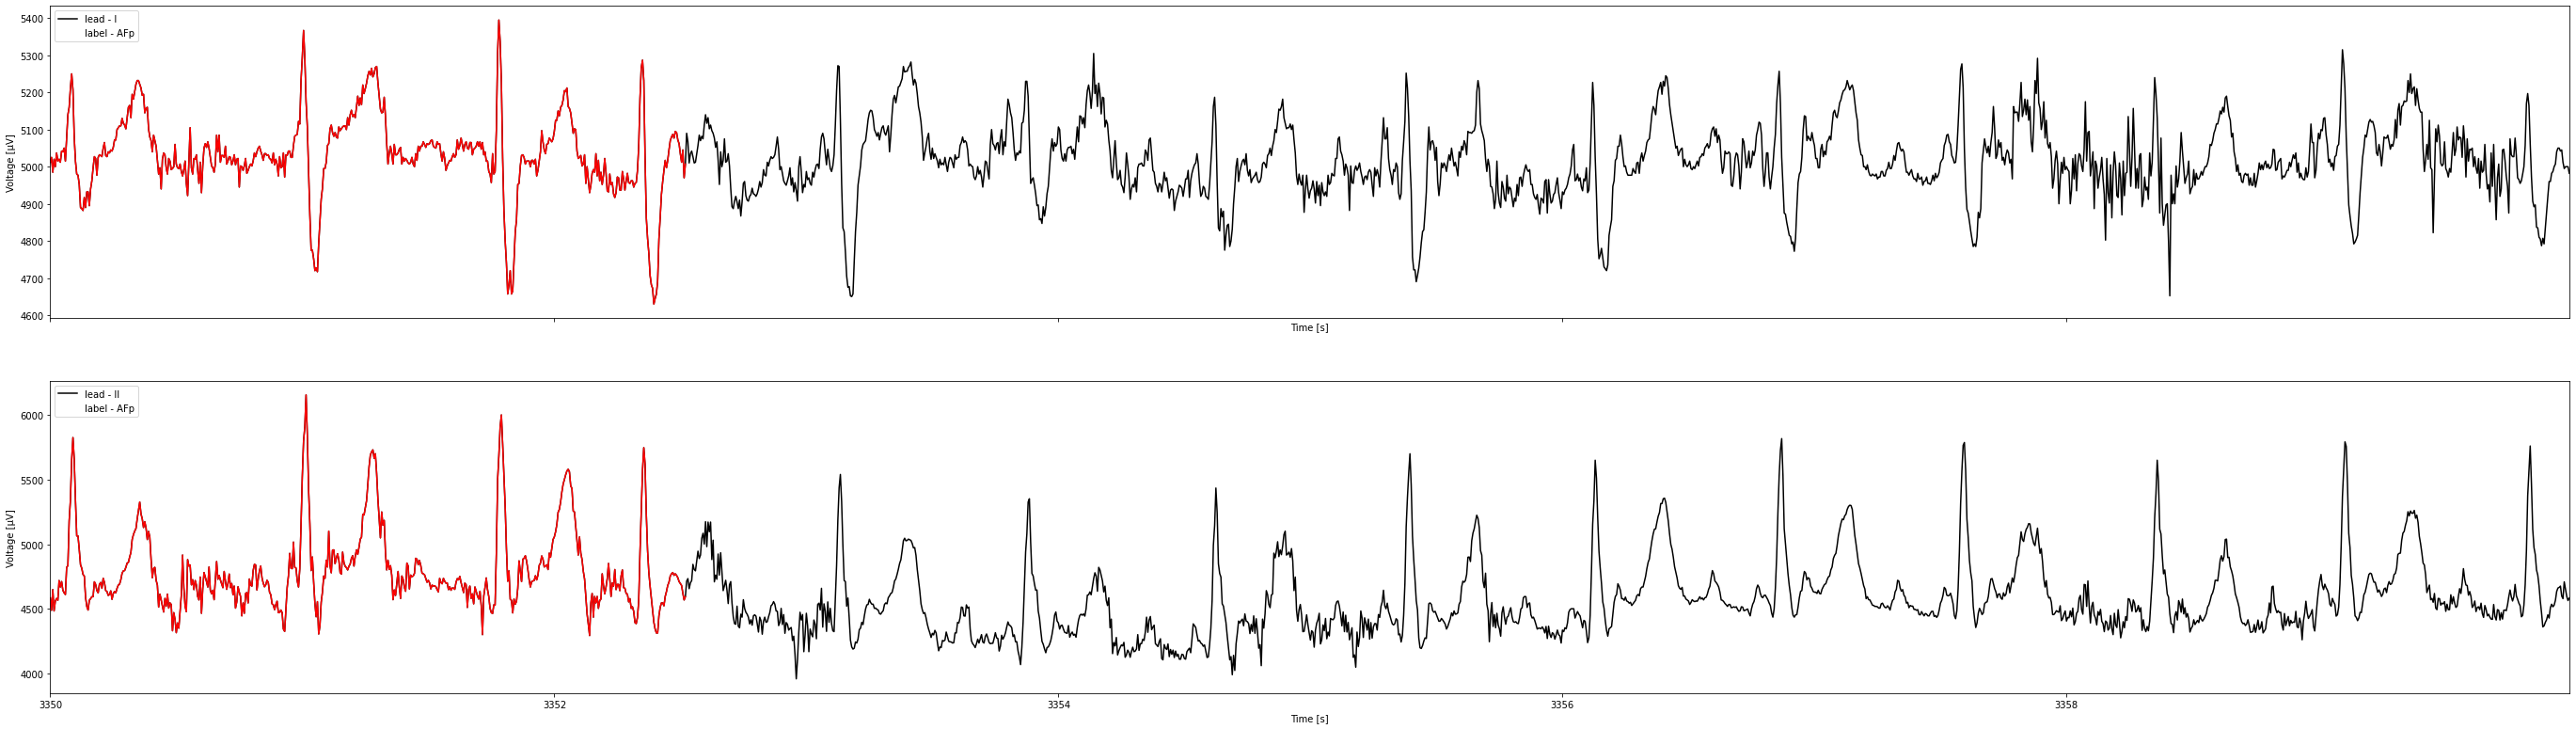

In [63]:
dr.plot(rec, sampfrom=670000, sampto=672000)

### AFf

In [43]:
rec = dr.diagnoses_records_list["AFf"][42]

rec

'data_11_5'

In [44]:
dr.load_ann(rec)

{'rpeaks': array([    30,    164,    380, ..., 958910, 959146, 959365]),
 'af_episodes': [[0, 959394]],
 'label': 'AFf'}

In [45]:
dr.load_label(rec, fmt="f"), dr.load_label(rec, fmt="a"), dr.load_label(rec, fmt="n")

('persistent atrial fibrillation', 'AFf', 1)

In [46]:
hehe_rpeaks = dr.load_rpeaks(rec)
hehe_rpeaks.shape

(5153,)

In [47]:
dr.load_rpeaks(rec, sampfrom=100, zero_start=True)

array([    64,    280,    399, ..., 958810, 959046, 959265])

In [48]:
dr.load_af_episodes(rec, fmt="intervals")

[[0, 959394]]

In [49]:
dr.load_af_episodes(rec, fmt="c_intervals")

[[0, 5154]]

In [50]:
hehe_mask = dr.load_af_episodes(rec, fmt="mask")

hehe_mask.shape

(959395,)

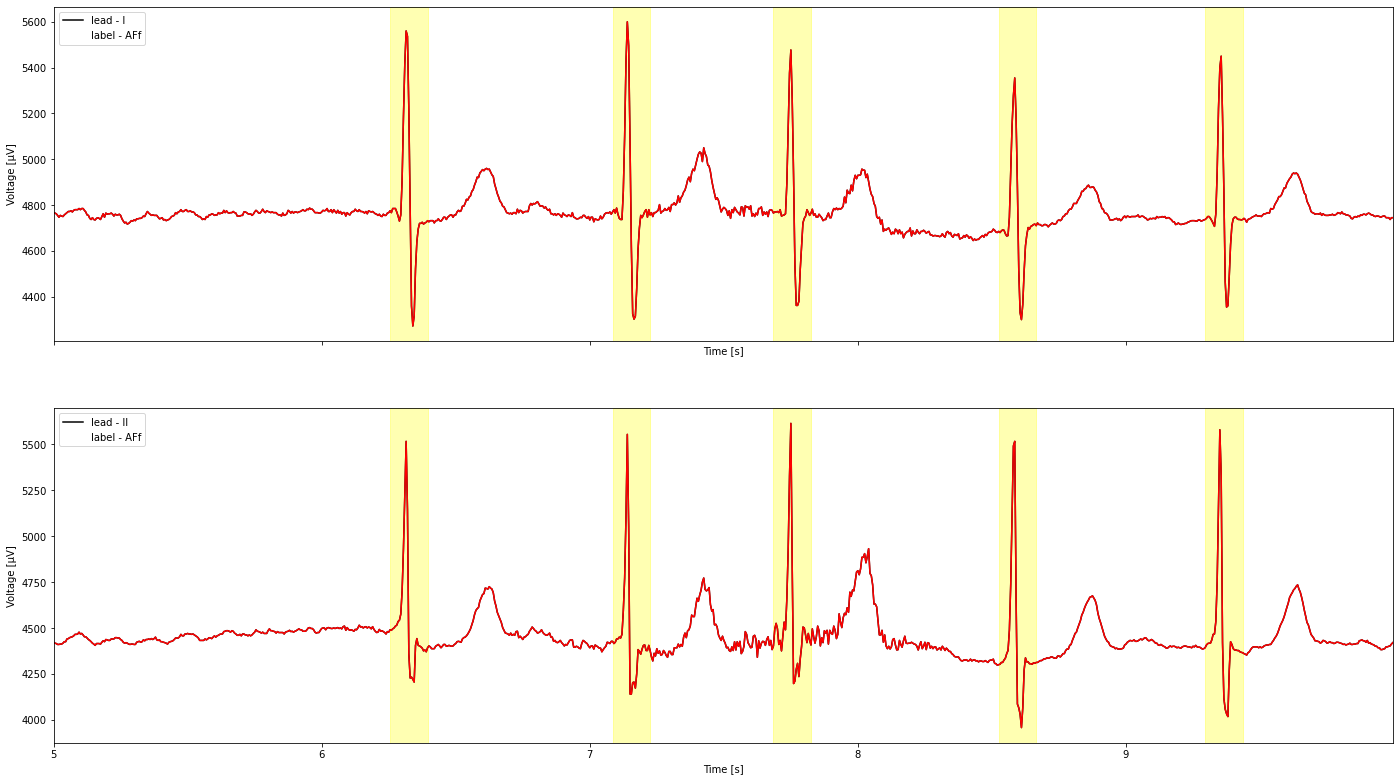

In [51]:
dr.plot(rec, sampfrom=1000, sampto=2000)

# utils check

In [64]:
from utils.utils_signal import get_ampl, ensure_siglen

In [69]:
get_ampl(dr.load_data(rec), fs=dr.fs, critical_points=dr.load_rpeaks(rec))

array([1.64798, 4.09994])

In [70]:
get_ampl(dr.load_data(rec), fs=dr.fs)

array([2.57297, 3.75296])

# check custom scoring metrics

In [75]:
from utils.scoring_metrics_test import run_test, run_single_test

In [72]:
?run_test

In [73]:
l_rec = [dr._get_path(rec) for rec in dr.all_records]

In [74]:
run_test(l_rec)

------  data_0_1 starts ------

record = data_0_1,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_0_1 finishes -----

------  data_0_2 starts ------

record = data_0_2,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_0_2 finishes -----

------  data_0_3 starts ------

record = data_0_3,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_0_3 finishes -----

------  data_0_4 starts ------

record = data_0_4,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_0_4 finishes -----

------  data_0_5 starts ------

record = data_0_5,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_0_5 finishes -----

------  data_0_6 starts ------

record = data_0_6,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_0_6 finishes -----

------  data_4_7 starts ------

record = data_4_7,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_4_7 finishes -----

------  data_4_8 starts ------

record = data_4_8,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_4_8 finishes -----

------  data_4_9 starts ------

record = data_4_9,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_4_9 finishes -----

-----  data_4_10 starts ------

record = data_4_10,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_4_10 finishes -----

------  data_5_1 starts ------

record = data_5_1,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_5_1 finishes -----

------  data_5_2 starts ------

record = data_5_2,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

-----  data_5_2 finishes ----

-----  data_8_18 starts ------

record = data_8_18,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_8_18 finishes -----

-----  data_8_19 starts ------

record = data_8_19,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_8_19 finishes -----

-----  data_8_20 starts ------

record = data_8_20,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_8_20 finishes -----

-----  data_8_21 starts ------

record = data_8_21,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_8_21 finishes -----

-----  data_8_22 starts ------

record = data_8_22,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_8_22 finishes -----

-----  data_8_23 starts ------

record = data_8_23,
class = persistent atrial fibrillation,

onset masks agree: True
offset m

-----  data_13_4 starts ------

record = data_13_4,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_13_4 finishes -----

-----  data_13_5 starts ------

record = data_13_5,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_13_5 finishes -----

-----  data_13_6 starts ------

record = data_13_6,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_13_6 finishes -----

-----  data_13_7 starts ------

record = data_13_7,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_13_7 finishes -----

-----  data_13_8 starts ------

record = data_13_8,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_13_8 finishes -----

-----  data_13_9 starts ------

record = data_13_9,
class = persistent atrial fibrillation,

onset masks agree: True
offset m

onset masks agree: True
offset masks agree: True

----  data_17_1 finishes -----

-----  data_17_2 starts ------

record = data_17_2,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_17_2 finishes -----

-----  data_17_3 starts ------

record = data_17_3,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_17_3 finishes -----

-----  data_17_4 starts ------

record = data_17_4,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_17_4 finishes -----

-----  data_17_5 starts ------

record = data_17_5,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_17_5 finishes -----

-----  data_17_6 starts ------

record = data_17_6,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_17_6 finishes -----

-----  data_17_7 starts ------

record = data_17_7,
class = non atrial fibrill

-----  data_21_12 starts -----

record = data_21_12,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_21_12 finishes ----

-----  data_21_13 starts -----

record = data_21_13,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_21_13 finishes ----

-----  data_21_14 starts -----

record = data_21_14,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_21_14 finishes ----

-----  data_21_15 starts -----

record = data_21_15,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_21_15 finishes ----

-----  data_21_16 starts -----

record = data_21_16,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_21_16 finishes ----

-----  data_21_17 starts -----

record = data_21_17,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_

onset masks agree: True
offset masks agree: True

----  data_24_21 finishes ----

-----  data_24_22 starts -----

record = data_24_22,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_24_22 finishes ----

-----  data_24_23 starts -----

record = data_24_23,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_24_23 finishes ----

-----  data_24_24 starts -----

record = data_24_24,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_24_24 finishes ----

-----  data_24_25 starts -----

record = data_24_25,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_24_25 finishes ----

-----  data_24_26 starts -----

record = data_24_26,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_24_26 finishes ----

-----  data_25_1 starts ------

record

-----  data_27_7 starts ------

record = data_27_7,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_27_7 finishes -----

-----  data_27_8 starts ------

record = data_27_8,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_27_8 finishes -----

-----  data_27_9 starts ------

record = data_27_9,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_27_9 finishes -----

-----  data_27_10 starts -----

record = data_27_10,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_27_10 finishes ----

-----  data_28_1 starts ------

record = data_28_1,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_28_1 finishes -----

-----  data_28_2 starts ------

record = data_28_2,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_28_2 finishe

-----  data_31_17 starts -----

record = data_31_17,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_31_17 finishes ----

-----  data_31_18 starts -----

record = data_31_18,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_31_18 finishes ----

-----  data_31_19 starts -----

record = data_31_19,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_31_19 finishes ----

-----  data_31_20 starts -----

record = data_31_20,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_31_20 finishes ----

-----  data_31_21 starts -----

record = data_31_21,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_31_21 finishes ----

-----  data_32_1 starts ------

record = data_32_1,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_3

-----  data_33_16 starts -----

record = data_33_16,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_33_16 finishes ----

-----  data_33_17 starts -----

record = data_33_17,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_33_17 finishes ----

-----  data_33_18 starts -----

record = data_33_18,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_33_18 finishes ----

-----  data_33_19 starts -----

record = data_33_19,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_33_19 finishes ----

-----  data_33_20 starts -----

record = data_33_20,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_33_20 finishes ----

-----  data_33_21 starts -----

record = data_33_21,
class = persistent atrial fibrillation,

onset masks agree: True
of

-----  data_36_5 starts ------

record = data_36_5,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_36_5 finishes -----

-----  data_36_6 starts ------

record = data_36_6,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_36_6 finishes -----

-----  data_36_7 starts ------

record = data_36_7,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_36_7 finishes -----

-----  data_36_8 starts ------

record = data_36_8,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_36_8 finishes -----

-----  data_37_1 starts ------

record = data_37_1,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_37_1 finishes -----

-----  data_37_2 starts ------

record = data_37_2,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: Tr

onset masks agree: True
offset masks agree: True

----  data_41_4 finishes -----

-----  data_41_5 starts ------

record = data_41_5,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_41_5 finishes -----

-----  data_41_6 starts ------

record = data_41_6,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_41_6 finishes -----

-----  data_41_7 starts ------

record = data_41_7,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_41_7 finishes -----

-----  data_41_8 starts ------

record = data_41_8,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_41_8 finishes -----

-----  data_41_9 starts ------

record = data_41_9,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_41_9 finishes -----

-----  data_41_10 starts -----

record = data_41_10,
class = non atrial fibril

-----  data_44_11 starts -----

record = data_44_11,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_44_11 finishes ----

-----  data_44_12 starts -----

record = data_44_12,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_44_12 finishes ----

-----  data_44_13 starts -----

record = data_44_13,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_44_13 finishes ----

-----  data_44_14 starts -----

record = data_44_14,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_44_14 finishes ----

-----  data_44_15 starts -----

record = data_44_15,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_44_15 finishes ----

-----  data_44_16 starts -----

record = data_44_16,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_44_16 f

-----  data_48_3 starts ------

record = data_48_3,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_48_3 finishes -----

-----  data_48_4 starts ------

record = data_48_4,
class = paroxysmal atrial fibrillation,

onset masks agree: False
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
offset masks agree: True

----  data_48_4 finishes -----

-----  data_48_5 starts ------

record = data_48_5,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_48_5 finishes -----

-----  data_48_6 starts ------

record = data_48_6,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_48_6 finishes -----

-----  data_48_7 starts ------

record = data_48_7,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_48_7 finishes -----

-----  data_48_8 starts ------


-----  data_51_5 starts ------

record = data_51_5,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_51_5 finishes -----

-----  data_51_6 starts ------

record = data_51_6,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_51_6 finishes -----

-----  data_51_7 starts ------

record = data_51_7,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_51_7 finishes -----

-----  data_51_8 starts ------

record = data_51_8,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_51_8 finishes -----

-----  data_51_9 starts ------

record = data_51_9,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_51_9 finishes -----

-----  data_51_10 starts -----

record = data_51_10,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_51_10 finish

onset masks agree: True
offset masks agree: True

----  data_55_10 finishes ----

-----  data_56_1 starts ------

record = data_56_1,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_56_1 finishes -----

-----  data_56_2 starts ------

record = data_56_2,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_56_2 finishes -----

-----  data_56_3 starts ------

record = data_56_3,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_56_3 finishes -----

-----  data_56_4 starts ------

record = data_56_4,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_56_4 finishes -----

-----  data_56_5 starts ------

record = data_56_5,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_56_5 finishes -----

-----  data_56_6 starts ------

record = da

-----  data_59_13 starts -----

record = data_59_13,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_59_13 finishes ----

-----  data_59_14 starts -----

record = data_59_14,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_59_14 finishes ----

-----  data_59_15 starts -----

record = data_59_15,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_59_15 finishes ----

-----  data_59_16 starts -----

record = data_59_16,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_59_16 finishes ----

-----  data_59_17 starts -----

record = data_59_17,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_59_17 finishes ----

-----  data_59_18 starts -----

record = data_59_18,
class = persistent atrial fibrillation,

onset masks agree: True
of

-----  data_64_3 starts ------

record = data_64_3,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_64_3 finishes -----

-----  data_64_4 starts ------

record = data_64_4,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_64_4 finishes -----

-----  data_64_5 starts ------

record = data_64_5,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_64_5 finishes -----

-----  data_64_6 starts ------

record = data_64_6,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_64_6 finishes -----

-----  data_64_7 starts ------

record = data_64_7,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_64_7 finishes -----

-----  data_64_8 starts ------

record = data_64_8,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

---

onset masks agree: True
offset masks agree: True

----  data_67_16 finishes ----

-----  data_67_17 starts -----

record = data_67_17,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_67_17 finishes ----

-----  data_67_18 starts -----

record = data_67_18,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_67_18 finishes ----

-----  data_67_19 starts -----

record = data_67_19,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_67_19 finishes ----

-----  data_67_20 starts -----

record = data_67_20,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_67_20 finishes ----

-----  data_67_21 starts -----

record = data_67_21,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_67_21 finishes ----

-----  data_67_22 starts -----

record

-----  data_70_9 starts ------

record = data_70_9,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_70_9 finishes -----

-----  data_70_10 starts -----

record = data_70_10,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_70_10 finishes ----

-----  data_70_11 starts -----

record = data_70_11,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_70_11 finishes ----

-----  data_70_12 starts -----

record = data_70_12,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_70_12 finishes ----

-----  data_70_13 starts -----

record = data_70_13,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_70_13 finishes ----

-----  data_70_14 starts -----

record = data_70_14,
class = persistent atrial fibrillation,

onset masks agree: True
off

-----  data_73_4 starts ------

record = data_73_4,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_73_4 finishes -----

-----  data_73_5 starts ------

record = data_73_5,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_73_5 finishes -----

-----  data_73_6 starts ------

record = data_73_6,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_73_6 finishes -----

-----  data_73_7 starts ------

record = data_73_7,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_73_7 finishes -----

-----  data_73_8 starts ------

record = data_73_8,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_73_8 finishes -----

-----  data_73_9 starts ------

record = data_73_9,
class = persistent atrial fibrillation,

onset masks agree: True
offset m

onset masks agree: True
offset masks agree: True

----  data_78_4 finishes -----

-----  data_78_5 starts ------

record = data_78_5,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_78_5 finishes -----

-----  data_78_6 starts ------

record = data_78_6,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_78_6 finishes -----

-----  data_78_7 starts ------

record = data_78_7,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_78_7 finishes -----

-----  data_78_8 starts ------

record = data_78_8,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_78_8 finishes -----

-----  data_78_9 starts ------

record = data_78_9,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_78_9 finishes -----

-----  data_78_10 starts -----

record = data_78_10,
class = non atrial fibril

-----  data_82_6 starts ------

record = data_82_6,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_82_6 finishes -----

-----  data_82_7 starts ------

record = data_82_7,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_82_7 finishes -----

-----  data_83_1 starts ------

record = data_83_1,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_83_1 finishes -----

-----  data_83_2 starts ------

record = data_83_2,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_83_2 finishes -----

-----  data_83_3 starts ------

record = data_83_3,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_83_3 finishes -----

-----  data_83_4 starts ------

record = data_83_4,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data

-----  data_87_13 starts -----

record = data_87_13,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_87_13 finishes ----

-----  data_87_14 starts -----

record = data_87_14,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_87_14 finishes ----

-----  data_87_15 starts -----

record = data_87_15,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_87_15 finishes ----

-----  data_87_16 starts -----

record = data_87_16,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_87_16 finishes ----

-----  data_87_17 starts -----

record = data_87_17,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_87_17 finishes ----

-----  data_87_18 starts -----

record = data_87_18,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_87_18 f

-----  data_91_7 starts ------

record = data_91_7,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_91_7 finishes -----

-----  data_91_8 starts ------

record = data_91_8,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_91_8 finishes -----

-----  data_91_9 starts ------

record = data_91_9,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_91_9 finishes -----

-----  data_91_10 starts -----

record = data_91_10,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_91_10 finishes ----

-----  data_91_11 starts -----

record = data_91_11,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_91_11 finishes ----

-----  data_91_12 starts -----

record = data_91_12,
class = persistent atrial fibrillation,

onset masks agree: True
offse

-----  data_93_10 starts -----

record = data_93_10,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_93_10 finishes ----

-----  data_93_11 starts -----

record = data_93_11,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_93_11 finishes ----

-----  data_93_12 starts -----

record = data_93_12,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_93_12 finishes ----

-----  data_93_13 starts -----

record = data_93_13,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_93_13 finishes ----

-----  data_93_14 starts -----

record = data_93_14,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_93_14 finishes ----

-----  data_93_15 starts -----

record = data_93_15,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_93_15 f

-----  data_96_11 starts -----

record = data_96_11,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_96_11 finishes ----

-----  data_96_12 starts -----

record = data_96_12,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_96_12 finishes ----

-----  data_96_13 starts -----

record = data_96_13,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_96_13 finishes ----

-----  data_96_14 starts -----

record = data_96_14,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_96_14 finishes ----

-----  data_96_15 starts -----

record = data_96_15,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_96_15 finishes ----

-----  data_96_16 starts -----

record = data_96_16,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

----

-----  data_99_16 starts -----

record = data_99_16,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_99_16 finishes ----

-----  data_99_17 starts -----

record = data_99_17,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_99_17 finishes ----

-----  data_99_18 starts -----

record = data_99_18,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_99_18 finishes ----

-----  data_99_19 starts -----

record = data_99_19,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_99_19 finishes ----

-----  data_99_20 starts -----

record = data_99_20,
class = persistent atrial fibrillation,

onset masks agree: True
offset masks agree: True

----  data_99_20 finishes ----

-----  data_99_21 starts -----

record = data_99_21,
class = persistent atrial fibrillation,

onset masks agree: True
of

----  data_104_14 starts -----

record = data_104_14,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

---  data_104_14 finishes ----

----  data_104_15 starts -----

record = data_104_15,
class = non atrial fibrillation,

onset masks agree: True
offset masks agree: True

---  data_104_15 finishes ----

----  data_104_16 starts -----

record = data_104_16,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

---  data_104_16 finishes ----

----  data_104_17 starts -----

record = data_104_17,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

---  data_104_17 finishes ----

----  data_104_18 starts -----

record = data_104_18,
class = paroxysmal atrial fibrillation,

onset masks agree: True
offset masks agree: True

---  data_104_18 finishes ----

----  data_104_19 starts -----

record = data_104_19,
class = paroxysmal atrial fibrillation,

onset masks agree: True
off

In [77]:
run_single_test(dr._get_path("data_39_4"), verbose=True)

-----  data_39_4 starts ------

record = data_39_4,
class = paroxysmal atrial fibrillation,

custom --- onset (c_ind, score 1): 67 --- 70
custom --- onset (sample, score 1): 10816 --- 11033
custom --- offset (c_ind, score 1): 76 --- 79
custom --- offset (sample, score 1): 11757 --- 12154
custom --- onset (c_ind, score 1): 138 --- 141
custom --- onset (sample, score 1): 21917 --- 22134
custom --- offset (c_ind, score 1): 339 --- 342
custom --- offset (sample, score 1): 48551 --- 48906
custom --- onset (c_ind, score 1): 411 --- 414
custom --- onset (sample, score 1): 60670 --- 60893
custom --- offset (c_ind, score 1): 472 --- 475
custom --- offset (sample, score 1): 68247 --- 68547
custom --- onset (c_ind, score 1): 593 --- 596
custom --- onset (sample, score 1): 88501 --- 88716
custom --- offset (c_ind, score 1): 607 --- 610
custom --- offset (sample, score 1): 90077 --- 90366
custom --- onset (c_ind, score 0.5): 66 --- 71
custom --- onset (sample, score 0.5): 10650 --- 11169
custom ---

False